### 数据读取模块


In [27]:
import paddle
from paddle.vision.transforms import Normalize, Compose, Transpose
from paddle.vision.datasets import Cifar10
from paddle.vision.transforms import Resize
def get_cifar10_dataloader():
    # cifar10是一个三通道的图片
    transforms = Compose([Resize(64), Transpose() ])
    # 数据集
    train_datasets = Cifar10(mode='train', transform=transforms)
    test_datasets = Cifar10(mode='test', transform=transforms)
    # 数据读取器
    train_loader = paddle.io.DataLoader(train_datasets, batch_size=64, shuffle = True, num_workers=2, drop_last=True)
    test_loader = paddle.io.DataLoader(test_datasets, batch_size=64, shuffle = False, num_workers=2, drop_last=False)
    return train_loader, test_loader

In [26]:
import itertools
from matplotlib import pyplot as plt
import paddle.vision.transforms as T
from paddle.vision.datasets import Cifar10


cifar10 = Cifar10()
print(len(cifar10))
# 50000


transform = T.Compose(
    [
        T.Resize(64),
        T.ToTensor(),
        T.Normalize(
            mean=[0.5, 0.5, 0.5],
            std=[0.5, 0.5, 0.5],
            to_rgb=True,
        ),
    ]
)

cifar10_test = Cifar10(
    mode="test",
    transform=transform,  # apply transform to every image
    backend="pil",  # use OpenCV as image transform backend
)
print(len(cifar10_test))
# 10000

for img, label in itertools.islice(iter(cifar10_test), 5):  # only show first 5 images
    # do something with img and label
    print(type(img), img.shape, label)
    # <class 'paddle.Tensor'> [3, 64, 64] 3


50000
10000
<class 'paddle.Tensor'> [3, 64, 64] 3
<class 'paddle.Tensor'> [3, 64, 64] 8
<class 'paddle.Tensor'> [3, 64, 64] 8
<class 'paddle.Tensor'> [3, 64, 64] 0
<class 'paddle.Tensor'> [3, 64, 64] 6


In [28]:
train_loader, test_loader = get_cifar10_dataloader()
for batch_id, data in enumerate(train_loader()):
    print(batch_id, data[0], data[1].shape)
    break

0 Tensor(shape=[64, 3, 64, 64], dtype=uint8, place=Place(gpu_pinned), stop_gradient=True,
       [[[[220, 219, 218, ..., 224, 227, 228],
          [213, 212, 210, ..., 216, 221, 224],
          [198, 197, 194, ..., 200, 210, 215],
          ...,
          [153, 147, 136, ..., 246, 246, 246],
          [168, 166, 160, ..., 248, 249, 249],
          [176, 175, 172, ..., 249, 250, 250]],

         [[229, 229, 228, ..., 231, 234, 236],
          [224, 224, 223, ..., 226, 230, 233],
          [213, 213, 212, ..., 215, 223, 227],
          ...,
          [157, 153, 142, ..., 245, 246, 246],
          [172, 170, 165, ..., 248, 249, 249],
          [179, 178, 176, ..., 249, 250, 250]],

         [[226, 226, 225, ..., 229, 232, 234],
          [220, 220, 219, ..., 223, 228, 230],
          [208, 207, 206, ..., 210, 219, 223],
          ...,
          [157, 152, 142, ..., 245, 246, 247],
          [171, 169, 164, ..., 247, 248, 248],
          [178, 177, 175, ..., 248, 249, 249]]],


        [[[

e:\SoftWare\Program\Anaconda\envs\d2l\lib\site-packages\paddle\io\reader.py:433: UserWarning: DataLoader with multi-process mode is not supported on MacOs and Windows currently. Please use signle-process mode with num_workers = 0 instead
  warnings.warn(


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


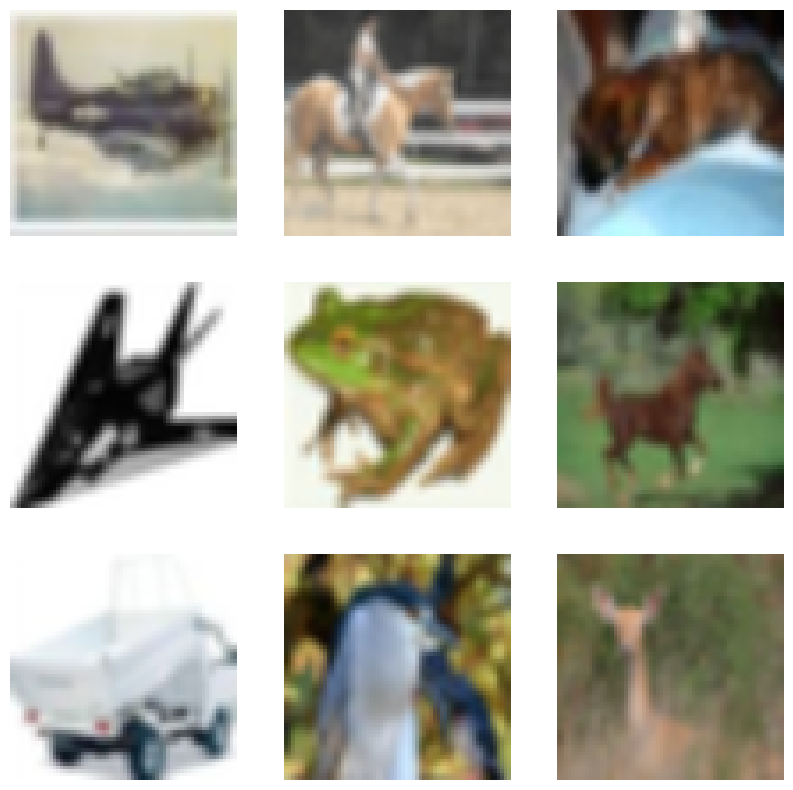

In [31]:
from matplotlib import pyplot as plt
import numpy as np

for batch_id, data in enumerate(train_loader()):
    plt.figure(figsize=(10, 10))
    try:
        for i in range(9):  # 显示前9张图像
            image = np.array(data[0][i]).transpose((1, 2, 0))  # 调整轴顺序以匹配matplotlib的预期
            # 反归一化
            print(image.shape)
            plt.subplot(3, 3, i + 1)
            plt.imshow(image)
            plt.axis('off')
        plt.show()
        break
    except IOError:
        print(IOError)


In [13]:
from matplotlib import pyplot as plt
import numpy as np


for batch_id, data in enumerate(train_loader()):
    plt.figure(figsize=(15,15))
    try:
        for i in range(100):
            image = np.array(data[0][i])[0].transpose((2,1,0))
            plt.subplot(10, 10, i + 1)
            plt.imshow(image, vmin=-1, vmax=1)
            plt.axis('off')
            plt.xticks([])
            plt.yticks([])
            plt.subplots_adjust(wspace=0.1, hspace=0.1)
        plt.suptitle('\n Training Images',fontsize=30)
        plt.show()
        break
    except IOError:
        print(IOError)

ValueError: axes don't match array

<Figure size 1500x1500 with 0 Axes>